# Análise preliminar dos dados brutos do DEMOGRAPHY

In [128]:
import pandas as pd 
dm = pd.read_csv('demography.csv')

dm.head()

,FREQ,TERRITORIAL_LEVEL,REF_AREA,TERRITORIAL_TYPE,MEASURE,AGE,SEX,UNIT_MEASURE,TIME_PERIOD,value
0,A,CTRY,JPN,_Z,POP,_T,F,PS,2010,65729000.0
1,A,CTRY,AUS,_Z,POP,_T,F,PS,2010,11063919.0
2,A,CTRY,USA,_Z,POP,_T,F,PS,2010,156969328.0
3,A,CTRY,GBR,_Z,POP,_T,F,PS,2010,31954200.0
4,A,CTRY,KOR,_Z,POP,_T,F,PS,2010,24672998.0


### Quais colunas nós temos?

In [129]:
dm.columns

Index(['FREQ', 'TERRITORIAL_LEVEL', 'REF_AREA', 'TERRITORIAL_TYPE', 'MEASURE',
       'AGE', 'SEX', 'UNIT_MEASURE', 'TIME_PERIOD', 'value'],
      dtype='object')

### Quais são os tipode de dados de cada coluna?

In [130]:
display(dm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23072 entries, 0 to 23071
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   FREQ               23072 non-null  object 
 1   TERRITORIAL_LEVEL  23072 non-null  object 
 2   REF_AREA           23072 non-null  object 
 3   TERRITORIAL_TYPE   23072 non-null  object 
 4   MEASURE            23072 non-null  object 
 5   AGE                23072 non-null  object 
 6   SEX                23072 non-null  object 
 7   UNIT_MEASURE       23072 non-null  object 
 8   TIME_PERIOD        23072 non-null  int64  
 9   value              23072 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.8+ MB


None

Colunas do tipo object indicam que eles podem ser de qualquer tipo, isso não é bom. É necessário ser tratado da bronze para a silver!

### Qual o shape da nossa tabela (linhas x colunas)?

In [131]:
dm.shape

(23072, 10)

*Resumo Inicial*:

É uma tabela que possui 23072 linhas e 10 colunas, sendo elas:
1. 'FREQ', 
2. 'TERRITORIAL_LEVEL', 
3. 'REF_AREA', 
4. 'TERRITORIAL_TYPE', 
5. 'MEASURE',  
6. 'AGE', 
7. 'SEX', 
8. 'UNIT_MEASURE', 
9. 'TIME_PERIOD', 
10. 'value'

- Todas as colunas são do tipo object exceto 'value' e 'TIME_PERIOD' que são do tipo float e int, respectivamente


## Análise descritiva dos dados

- O método describe originalmente faz a análise apenas das colunas numéricas:

In [132]:
dm.describe()

,TIME_PERIOD,value
count,23072.000000,2.307200e+04
mean,2011.054915,1.317379e+07
std,6.654789,8.521771e+07
min,2000.000000,-1.940500e+04
25%,2005.000000,7.887500e+01
50%,2011.000000,6.102200e+04
75%,2017.000000,1.221219e+06
max,2024.000000,1.410600e+09


- Aqui teremos uma análise descritiva das colunas que não são numéricas

In [133]:
dm.describe(exclude='number')

,FREQ,TERRITORIAL_LEVEL,REF_AREA,TERRITORIAL_TYPE,MEASURE,AGE,SEX,UNIT_MEASURE
count,23072,23072,23072,23072,23072,23072,23072,23072
unique,1,1,38,2,12,3,4,7
top,A,CTRY,NOR,_Z,LFEXP,_T,_T,PS
freq,23072,23072,804,11924,5169,14700,10388,6266


### Análise do describe

Aqui podemos decobrir algumas informações importantes:

- Estamos com dados de 38 países (coluna REF_AREA)
- Tem 12 measures, ou seja, como se fossem 12 indicadores
- Temos 7 UNIT_MEASURE, ou seja, unidades de medida
- Estamos com dados de frequência anual

Não podemos chegar em nenhuma conclusão sobre os valores numéricos, pois como temos 12 measures, os valores variam muito de acordo com o indicador(measure)


# O que mais podemos descobrir?

1. Quais são esses países?
2. Quais são esses 12 indicadores?
3. Quais são os 7 UNIT_MEASURE?<br>
3.1 Quais unit_measures acompanham cada MEASURE?
4. Todos os países tem os 21 indicadores com valores não nulos?
5. Qual o menor período e qual o maior? Qual é o intervalo (período) que estamos analisando?
6. Como fica o gráfico da comparação dos países com cada indicador?

#### 1. Quais são os países?

In [134]:
dm.REF_AREA.unique()

array(['JPN', 'AUS', 'USA', 'GBR', 'KOR', 'NLD', 'ESP', 'IND', 'CHN',
       'FRA', 'DEU', 'ITA', 'CAN', 'AUT', 'SWE', 'DNK', 'CHE', 'LUX',
       'CZE', 'IRL', 'FIN', 'ROU', 'HUN', 'GRC', 'PRT', 'BEL', 'POL',
       'CHL', 'COL', 'MEX', 'ARG', 'BRA', 'PER', 'IDN', 'ISR', 'NOR',
       'RUS', 'ZAF'], dtype=object)

#### 2. Quais são os indicadores?

In [135]:
dm.MEASURE.unique()

array(['POP', 'MORT', 'LAND_AREA', 'LFEXP', 'LIVE_BIRTHS', 'NETMOB',
       'INMOB', 'OUTMOB', 'MORT_ICDI_CRUDE_RATIO',
       'MORT_ICDV_CRUDE_RATIO', 'FERT_RATIO', 'MORT_ICDJ_CRUDE_RATIO'],
      dtype=object)

**Dicionário dos Indicadores (`MEASURE`)**

| Código                  | Nome (EN)                                        | Nome (PT)                                       |
| ----------------------- | ------------------------------------------------ | ----------------------------------------------- |
| `POP`                   | Population                                       | População total                                 |
| `MORT`                  | Deaths                                           | Número de mortes registradas                    |
| `FERT_RATIO`            | Fertility rate                                   | Taxa de fertilidade                             |
| `NETMOB`                | Net inter-regional mobility                      | Mobilidade líquida entre regiões                |
| `OUTMOB`                | Out-migration to another region of same country  | Saídas para outras regiões                      |
| `INMOB`                 | In-migration from another region of same country | Entradas vindas de outras regiões               |
| `MORT_ICDV_CRUDE_RATIO` | Mortality rate: transport accidents              | Taxa de mortalidade por acidentes de transporte |
| `LFEXP`                 | Life expectancy                                  | Expectativa de vida                             |
| `LIVE_BIRTHS`           | Live births                                      | Nascimentos vivos                               |
| `MORT_ICDJ_CRUDE_RATIO` | Mortality rate: respiratory diseases             | Taxa de mortalidade por doenças respiratórias   |
| `MORT_ICDI_CRUDE_RATIO` | Mortality rate: circulatory diseases             | Taxa de mortalidade por doenças circulatórias   |
| `LAND_AREA`             | Land area                                        | Área terrestre                                  |


#### 3. Quais são os 7 UNIT_MEASURE?


In [136]:
dm.UNIT_MEASURE.unique()

array(['PS', 'DT', 'KM2', 'Y', 'BR', '10P5HB', 'BR_L_W'], dtype=object)

**Unidade de Medida (`UNIT_MEASURE`)**

| Código   | Descrição                                      | Exemplo de uso                         |
| -------- | ---------------------------------------------- | -------------------------------------- |
| `PS`     | Pessoas (Population Stock)                     | POP, MORT                              |
| `Y`      | Anos de vida                                   | LFEXP (Expectativa de vida)            |
| `BR`     | Nascimentos (Births)                           | LIVE_BIRTHS                            |
| `DT`     | Taxa bruta (por mil habitantes, por exemplo)   | MORT_ICDI_CRUDE_RATIO                  |
| `BR_L_W` | Nascimentos por 1.000 mulheres em idade fértil | FERT_RATIO                             |
| `10P5HB` | Por 10.000 habitantes                          | Taxas específicas (ex: óbitos por 10k) |
| `KM2`    | Quilômetros quadrados                          | Área territorial                       |


#### 3.1 Quais unit_measures acompanham cada MEASURE?

In [137]:
import plotly.express as px
import numpy as np 

dm_null = dm.replace(0, np.nan) # Trocando os valores zero por nulo

# 1) Agrupar e contar
counts = (
    dm_null
      .groupby(['MEASURE', 'UNIT_MEASURE'])
      .agg(count=('value','count'))
      .reset_index()
)

fig = px.bar(
    counts,
    x="MEASURE",
    y="count",
    color="UNIT_MEASURE",
    barmode="group",
    height=600,
    text="count",
)

# Scroll horizontal (x-axis com range + modo interativo)
fig.update_layout(
  xaxis=dict(
    # rangeslider=dict(visible=True),  # adiciona slider
    type="category"
  ),
  height=700  # aumenta o tamanho da figura
)
fig.update_traces(
  textposition="outside",
  # textangle=45,
  # textfont_size=250,  # aumenta o tamanho do texto
  width=0.4
)
fig.show()



#### Análise do gráfico:

- O que é interessante de ver aqui é que cada MEASURE acompanha um única UNIT_MEASURE

| Indicador (`MEASURE`)   | Nome em Português                       | Unidade de Medida (`UNIT_MEASURE`) | Descrição da Unidade                           |
| ----------------------- | --------------------------------------- | ---------------------------------- | ---------------------------------------------- |
| `POP`                   | População total                         | `PS`                               | Pessoas (Population Stock)                     |
| `MORT`                  | Número de mortes registradas            | `PS`                               | Pessoas (Population Stock)                     |
| `FERT_RATIO`            | Taxa de fertilidade                     | `BR_L_W`                           | Nascimentos por 1.000 mulheres em idade fértil |
| `NETMOB`                | Mobilidade líquida entre regiões        | `PS`                               | Pessoas                                        |
| `OUTMOB`                | Saídas para outras regiões              | `PS`                               | Pessoas                                        |
| `INMOB`                 | Entradas vindas de outras regiões       | `PS`                               | Pessoas                                        |
| `MORT_ICDV_CRUDE_RATIO` | Mortalidade por acidentes de transporte | `10P5HB`                           | Por 10.000 habitantes                          |
| `LFEXP`                 | Expectativa de vida                     | `Y`                                | Anos de vida                                   |
| `LIVE_BIRTHS`           | Nascimentos vivos                       | `BR`                               | Nascimentos                                    |
| `MORT_ICDJ_CRUDE_RATIO` | Mortalidade por doenças respiratórias   | `10P5HB`                           | Por 10.000 habitantes                          |
| `MORT_ICDI_CRUDE_RATIO` | Mortalidade por doenças circulatórias   | `10P5HB`                           | Por 10.000 habitantes                          |
| `LAND_AREA`             | Área territorial                        | `KM2`                              | Quilômetros quadrados                          |




#### 5. Qual o menor período e qual o maior? Qual é o intervalo (período) que estamos analisando?



In [138]:
print(dm_null['TIME_PERIOD'].min())
print(dm_null['TIME_PERIOD'].max())

2000
2024


Estamos trabalhando com dados do período do primeiro trismestre de 2000 até o segundo trimestre de 2024!

#### 6. Como fica o gráfico da comparação dos países com cada indicador?

In [139]:
indicadores_interessantes = [
    "POP",                   # População total
    "LFEXP",                 # Expectativa de vida
    "FERT_RATIO",            # Taxa de fertilidade
    "LIVE_BIRTHS",           # Nascimentos vivos
    "MORT",                  # Número de mortes registradas
    "MORT_ICDI_CRUDE_RATIO", # Mortalidade por doenças circulatórias
    "MORT_ICDV_CRUDE_RATIO"  # Mortalidade por acidentes de transporte
]


principais_potencias = [
    "USA",  # Estados Unidos
    "CHN",  # China
    "DEU",  # Alemanha
    "JPN",  # Japão
    "IND",  # Índia
    "GBR",  # Reino Unido
    "BRA"   # Brasil
]



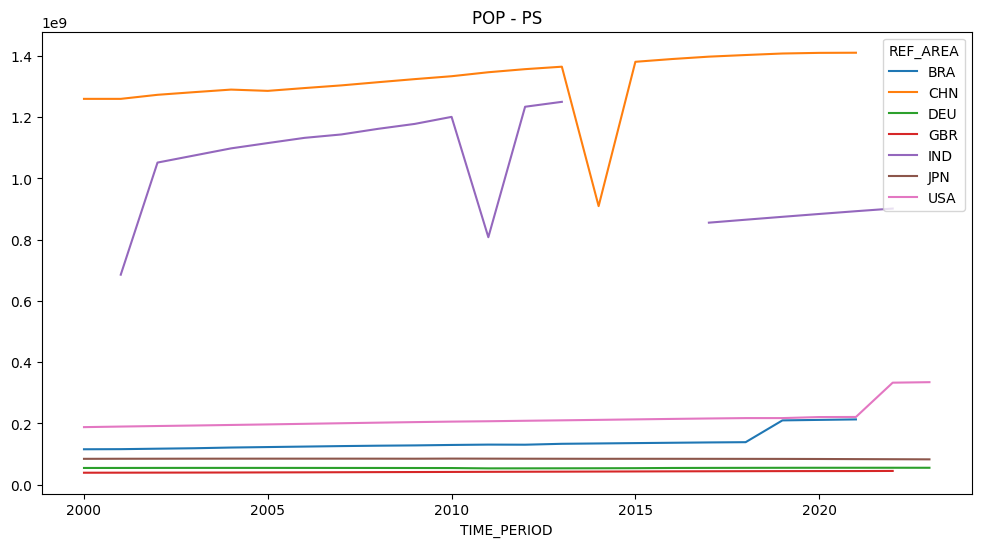

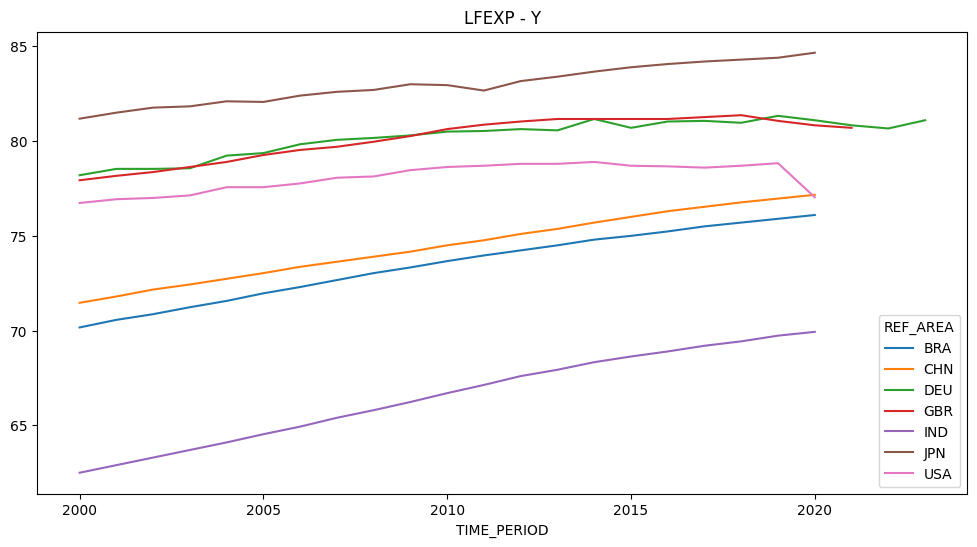

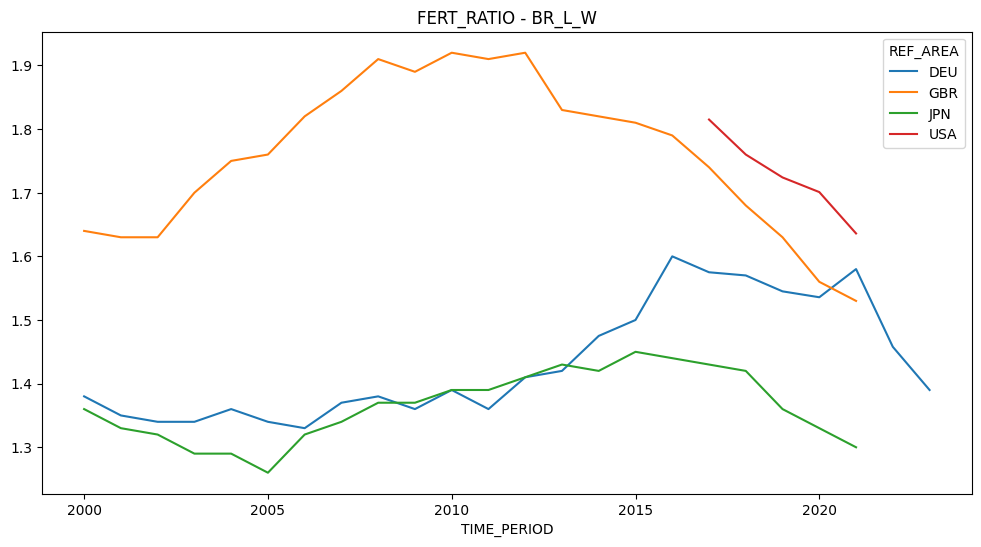

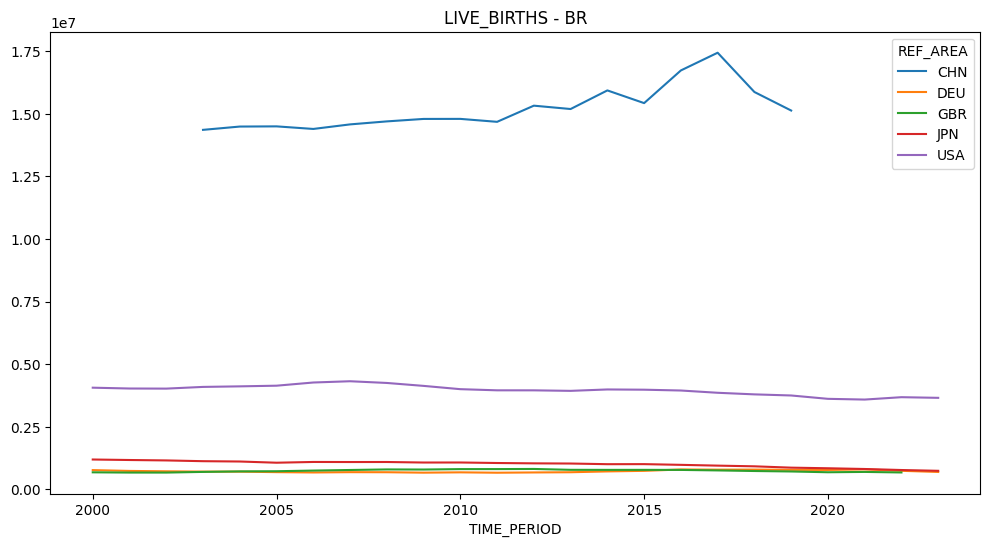

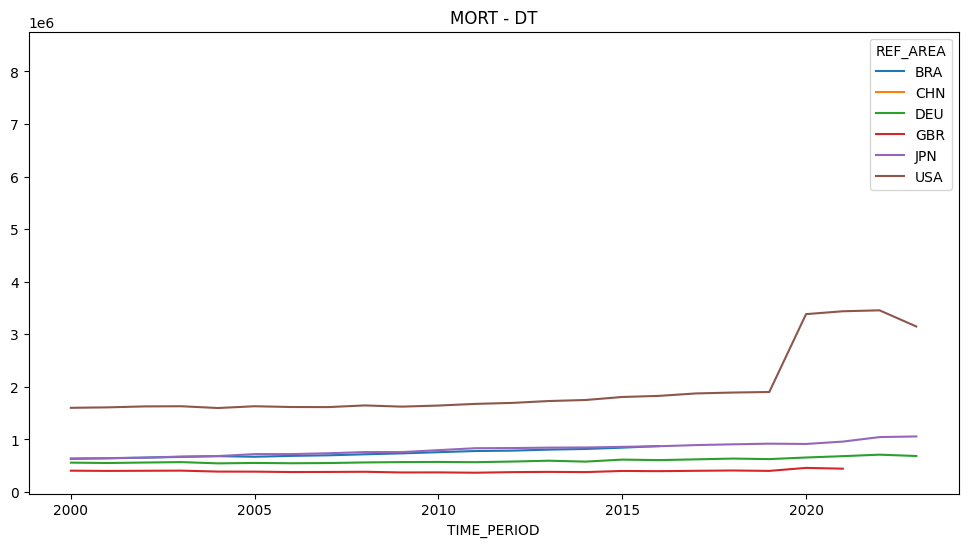

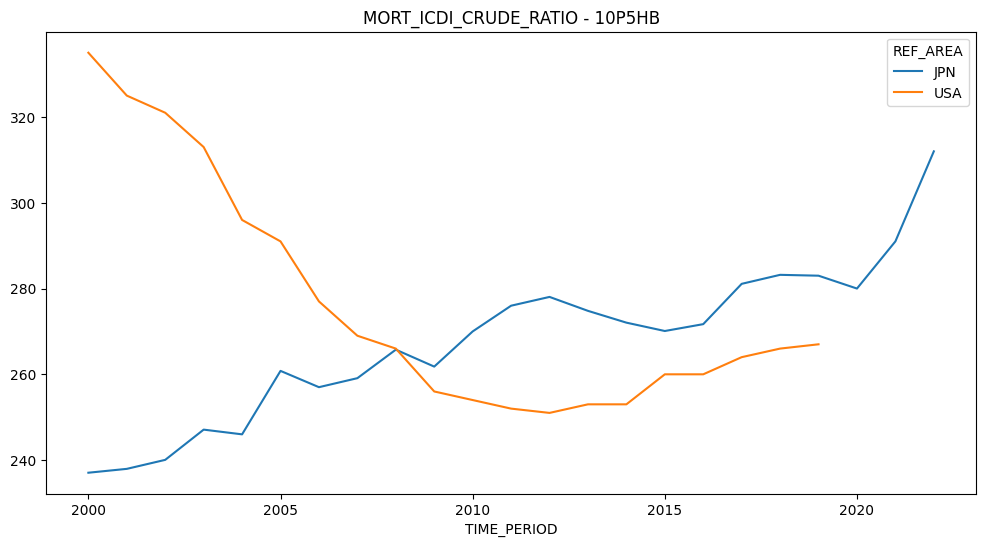

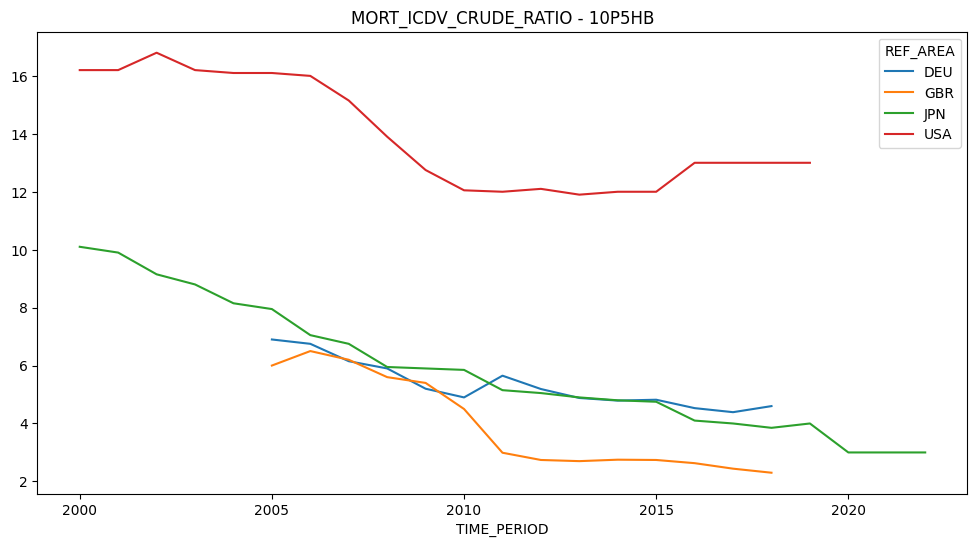

In [140]:
for indicador in indicadores_interessantes:
    df_filtrado = dm_null[(dm_null['MEASURE']== indicador) & (dm_null['REF_AREA'].isin(principais_potencias))]


    pivot_filtrado = df_filtrado.pivot_table(
        values='value',
        index='TIME_PERIOD',
        columns='REF_AREA',
    )
    nome_acc = df_filtrado.UNIT_MEASURE.unique()[0]
    nome = f"{indicador} - {nome_acc}"

    pivot_filtrado.plot(figsize=(12,6), title=nome)





In [152]:
dm_null = dm.replace(0, np.nan) # Trocando os valores zero por nulo

dm_null

,FREQ,TERRITORIAL_LEVEL,REF_AREA,TERRITORIAL_TYPE,MEASURE,AGE,SEX,UNIT_MEASURE,TIME_PERIOD,value
0,A,CTRY,JPN,_Z,POP,_T,F,PS,2010,65729000.0
1,A,CTRY,AUS,_Z,POP,_T,F,PS,2010,11063919.0
2,A,CTRY,USA,_Z,POP,_T,F,PS,2010,156969328.0
3,A,CTRY,GBR,_Z,POP,_T,F,PS,2010,31954200.0
4,A,CTRY,KOR,_Z,POP,_T,F,PS,2010,24672998.0
...,...,...,...,...,...,...,...,...,...,...
23067,A,CTRY,ZAF,_Z,LFEXP,Y0,_T,Y,2008,55.4
23068,A,CTRY,ZAF,_Z,LFEXP,Y0,M,Y,2007,52.0
23069,A,CTRY,ZAF,_Z,LFEXP,Y0,_T,Y,2006,53.8
23070,A,CTRY,ZAF,_Z,LFEXP,Y0,_T,Y,2004,53.4


In [142]:
dm_null.describe()

,TIME_PERIOD,value
count,23072.000000,2.273400e+04
mean,2011.054915,1.336965e+07
std,6.654789,8.583363e+07
min,2000.000000,-1.940500e+04
25%,2005.000000,7.930000e+01
50%,2011.000000,6.479700e+04
75%,2017.000000,1.279454e+06
max,2024.000000,1.410600e+09


In [143]:
dm_null.describe(exclude='number')

,FREQ,TERRITORIAL_LEVEL,REF_AREA,TERRITORIAL_TYPE,MEASURE,AGE,SEX,UNIT_MEASURE
count,23072,23072,23072,23072,23072,23072,23072,23072
unique,1,1,38,2,12,3,4,7
top,A,CTRY,NOR,_Z,LFEXP,_T,_T,PS
freq,23072,23072,804,11924,5169,14700,10388,6266


In [153]:
measure_indicators = {
    "POP": "populacao_total",
    "MORT": "mortes_registradas",
    "FERT_RATIO": "taxa_fertilidade",
    "NETMOB": "mobilidade_liquida",
    "OUTMOB": "saida_regional",
    "INMOB": "entrada_regional",
    "MORT_ICDV_CRUDE_RATIO": "morte_transporte",
    "LFEXP": "expectativa_vida",
    "LIVE_BIRTHS": "nascimentos_vivos",
    "MORT_ICDJ_CRUDE_RATIO": "morte_respiratoria",
    "MORT_ICDI_CRUDE_RATIO": "morte_circulatoria",
    "LAND_AREA": "area_terrestre"
}

unit_measure = {
    "PS": "pessoas_total",
    "Y": "anos_vida",
    "BR": "nascimentos_totais",
    "DT": "taxa_bruta",
    "BR_L_W": "nascimentos_mulheres",
    "10P5HB": "por_10mil",
    "KM2": "km_quadrado"
}


In [154]:
grupos = dm_null.groupby(['MEASURE','TERRITORIAL_TYPE'])

for tupla, df in grupos:
    print(tupla)

('FERT_RATIO', 'TYPO_METRO')
('FERT_RATIO', '_Z')
('INMOB', 'TYPO_METRO')
('INMOB', '_Z')
('LAND_AREA', 'TYPO_METRO')
('LAND_AREA', '_Z')
('LFEXP', 'TYPO_METRO')
('LFEXP', '_Z')
('LIVE_BIRTHS', 'TYPO_METRO')
('LIVE_BIRTHS', '_Z')
('MORT', 'TYPO_METRO')
('MORT', '_Z')
('MORT_ICDI_CRUDE_RATIO', 'TYPO_METRO')
('MORT_ICDI_CRUDE_RATIO', '_Z')
('MORT_ICDJ_CRUDE_RATIO', 'TYPO_METRO')
('MORT_ICDJ_CRUDE_RATIO', '_Z')
('MORT_ICDV_CRUDE_RATIO', 'TYPO_METRO')
('MORT_ICDV_CRUDE_RATIO', '_Z')
('NETMOB', 'TYPO_METRO')
('NETMOB', '_Z')
('OUTMOB', 'TYPO_METRO')
('OUTMOB', '_Z')
('POP', 'TYPO_METRO')
('POP', '_Z')


In [155]:
lista_dfs = []
merge_final = pd.DataFrame()
dm_null=dm_null[(dm_null.SEX.isin(['_T', '_Z'])) & (dm_null.TERRITORIAL_TYPE == 'TYPO_METRO')]
dm_null = dm_null.drop(columns=['AGE', 'SEX','TERRITORIAL_TYPE'])

for pais in dm_null.REF_AREA.unique():
    df_filtrado = dm_null[dm_null['REF_AREA'] == pais]
    grupos = df_filtrado.groupby(['REF_AREA','MEASURE','UNIT_MEASURE'])

    for i,valor in enumerate(grupos):
        chave, df = valor
        nome = measure_indicators.get(chave[1])
        ac_e = unit_measure.get(chave[2])
        df = df.rename(columns={'value': (f'value_{nome}_{ac_e}'),'MEASURE':(f"MEASURE_{nome}_{ac_e}"), 'UNIT_MEASURE' : (f"UNIT_MEASURE_{nome}_{ac_e}")})
        
        if i == 0:
            merge_final = df.copy()
        else:
            merge_final = pd.merge(merge_final, df, on=['REF_AREA', 'TERRITORIAL_LEVEL','FREQ','TIME_PERIOD'], how='outer')

    lista_dfs.append(merge_final)

df_final = pd.concat(lista_dfs, ignore_index=True)

  

In [156]:
df_final

,FREQ,TERRITORIAL_LEVEL,REF_AREA,MEASURE_entrada_regional_pessoas_total,UNIT_MEASURE_entrada_regional_pessoas_total,TIME_PERIOD,value_entrada_regional_pessoas_total,MEASURE_area_terrestre_km_quadrado,UNIT_MEASURE_area_terrestre_km_quadrado,value_area_terrestre_km_quadrado,...,value_saida_regional_pessoas_total,MEASURE_populacao_total_pessoas_total,UNIT_MEASURE_populacao_total_pessoas_total,value_populacao_total_pessoas_total,MEASURE_morte_circulatoria_por_10mil,UNIT_MEASURE_morte_circulatoria_por_10mil,value_morte_circulatoria_por_10mil,MEASURE_morte_respiratoria_por_10mil,UNIT_MEASURE_morte_respiratoria_por_10mil,value_morte_respiratoria_por_10mil
0,A,CTRY,DEU,INMOB,PS,2000,1136633.0,LAND_AREA,KM2,353296.0,...,1136638.0,POP,PS,82163475.0,NaN,NaN,NaN,NaN,NaN,NaN
1,A,CTRY,DEU,INMOB,PS,2001,1180821.0,LAND_AREA,KM2,353296.0,...,1177786.0,POP,PS,82259540.0,NaN,NaN,NaN,NaN,NaN,NaN
2,A,CTRY,DEU,INMOB,PS,2002,1153495.0,LAND_AREA,KM2,353296.0,...,1153438.0,POP,PS,82440309.0,NaN,NaN,NaN,NaN,NaN,NaN
3,A,CTRY,DEU,INMOB,PS,2003,1114858.0,LAND_AREA,KM2,353296.0,...,1114855.0,POP,PS,82536680.0,NaN,NaN,NaN,NaN,NaN,NaN
4,A,CTRY,DEU,INMOB,PS,2004,1094501.0,LAND_AREA,KM2,353296.0,...,1094500.0,POP,PS,82531671.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,A,CTRY,ZAF,NaN,NaN,2019,NaN,LAND_AREA,KM2,1221219.0,...,NaN,POP,PS,58775022.0,NaN,NaN,NaN,NaN,NaN,NaN
908,A,CTRY,ZAF,NaN,NaN,2020,NaN,LAND_AREA,KM2,1221219.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
909,A,CTRY,ZAF,NaN,NaN,2021,NaN,LAND_AREA,KM2,1221219.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
910,A,CTRY,ZAF,NaN,NaN,2022,NaN,LAND_AREA,KM2,1221219.0,...,NaN,POP,PS,60604994.0,NaN,NaN,NaN,NaN,NaN,NaN
